In [1]:
import pandas as pd
pd.set_option('display.max_rows', 200)

In this project, you'll analyze a data set containing information on different containerized freight journeys. You will transform the data as needed in order to analyze different aspects to meet the requirements outlined below.

The data sample was generated from a larger set of 250+ million rows. Please keep in mind the scalability of your code and methods if you were to move this analysis to a larger sample from the core data set.


#### Load and transform the data

Note: The actual file is not uploaded becasue it exceeds GitHub's file size limit of 100.00 MB

In [2]:
df = pd.read_csv('raw_data/vizion_data_challenge.csv') 
df.head()

,reference_id,reference_update_id,related_vessel,data_updated_at,event_raw_description,event_description,event_timestamp,event_location,event_mode,event_source,planned,carrier_code,reference_created_at,destination_port,origin_port
0,2d174ad549be-f1e4f5af-de86-4468-8274-2d174ad,2d174ad549be-f1e4f5af--de86-4468-8274-2d174ad,"{""imo"": ""9467421"", ""mmsi"": ""372400000"", ""vesse...",8/14/2022 11:38:53 PM,Full Intended Transshipment,Loaded transshipment,8/14/2022 6:30:00 PM,"{""city"": ""Colombo"", ""name"": ""Colombo, Lk"", ""st...",Vessel,carrier,False,MEDU,8/9/2022 1:50:14 AM,"{""city"": ""Savannah"", ""name"": ""Savannah, Us"", ""...","{""city"": ""Chattogram"", ""name"": ""Chattogram, Bd..."
1,2d174ad549be-f1e4f5af-de86-4468-8274-2d174ad,2d174ad549be-f1e4f5af--de86-4468-8274-2d174ad,"{""imo"": ""9230775"", ""mmsi"": ""636020978"", ""vesse...",8/14/2022 11:38:53 PM,Full Transshipment Discharged,Discharged from vessel at transshipment port,8/10/2022 6:30:00 PM,"{""city"": ""Colombo"", ""name"": ""Colombo, Lk"", ""st...",Vessel,carrier,False,MEDU,8/9/2022 1:50:14 AM,"{""city"": ""Savannah"", ""name"": ""Savannah, Us"", ""...","{""city"": ""Chattogram"", ""name"": ""Chattogram, Bd..."
2,2d174ad549be-f1e4f5af-de86-4468-8274-2d174ad,2d174ad549be-f1e4f5af--de86-4468-8274-2d174ad,"{""imo"": ""9230775"", ""mmsi"": ""636020978"", ""vesse...",8/14/2022 11:38:53 PM,Export Loaded on Vessel,Loaded on vessel at origin port,8/6/2022 6:00:00 PM,"{""city"": ""Chattogram"", ""name"": ""Chattogram, Bd...",Vessel,carrier,False,MEDU,8/9/2022 1:50:14 AM,"{""city"": ""Savannah"", ""name"": ""Savannah, Us"", ""...","{""city"": ""Chattogram"", ""name"": ""Chattogram, Bd..."
3,2d174ad549be-f1e4f5af-de86-4468-8274-2d174ad,2d174ad549be-f1e4f5af--de86-4468-8274-2d174ad,NaN,8/14/2022 11:38:53 PM,Export Positioning Out,Export Positioning Out,8/5/2022 6:00:00 PM,"{""city"": ""Chattogram"", ""name"": ""Chattogram, Bd...",NaN,carrier,False,MEDU,8/9/2022 1:50:14 AM,"{""city"": ""Savannah"", ""name"": ""Savannah, Us"", ""...","{""city"": ""Chattogram"", ""name"": ""Chattogram, Bd..."
4,2d174ad549be-f1e4f5af-de86-4468-8274-2d174ad,2d174ad549be-f1e4f5af--de86-4468-8274-2d174ad,NaN,8/14/2022 11:38:53 PM,Export Positioning In,Export Positioning In,8/5/2022 6:00:00 PM,"{""city"": ""Chattogram"", ""name"": ""Chattogram, Bd...",NaN,carrier,False,MEDU,8/9/2022 1:50:14 AM,"{""city"": ""Savannah"", ""name"": ""Savannah, Us"", ""...","{""city"": ""Chattogram"", ""name"": ""Chattogram, Bd..."


In [3]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110871 entries, 0 to 110870
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   reference_id           110871 non-null  object        
 1   reference_update_id    110871 non-null  object        
 2   related_vessel         69034 non-null   object        
 3   data_updated_at        110871 non-null  object        
 4   event_raw_description  110847 non-null  object        
 5   event_description      110847 non-null  object        
 6   event_timestamp        110360 non-null  datetime64[ns]
 7   event_location         110720 non-null  object        
 8   event_mode             103611 non-null  object        
 9   event_source           110847 non-null  object        
 10  planned                110650 non-null  object        
 11  carrier_code           110871 non-null  object        
 12  reference_created_at   110871 non-null  obje

### - For each of the 8 core ocean events, what is the rate of core events that have occurred of the total core events expected to occur once every journey is completed? Show this overall, per core event, and per core event per carrier?

In [4]:
core_ocean_events = ['Gate out from origin port', 
                     'Gate in at origin port',
                     'Loaded on vessel at origin port',
                     'Vessel departure from origin port',
                     'Vessel arrived at destination port',
                     'Discharged from vessel at destination port',
                     'Gate out from destination port',
                     'Gate in empty return']

In [5]:
core_event_count = df[df['event_description'].isin(core_ocean_events)]
expected_count = len(df['reference_id'].unique())

Overall, the rate of core events that have occurred of the total core events expected to occur is 56%.

In [6]:
# overall
round(len(core_event_count) / (expected_count*8), 2)

0.56

Per core event, the rates of core events that have occurred of the total core events expected to occur are as follows:

In [7]:
# per core event
round(core_event_count.groupby('event_description').count()['reference_id'] / expected_count, 2)

event_description
Discharged from vessel at destination port    0.38
Gate in at origin port                        0.92
Gate in empty return                          0.22
Gate out from destination port                0.31
Gate out from origin port                     0.62
Loaded on vessel at origin port               0.81
Vessel arrived at destination port            0.67
Vessel departure from origin port             0.53
Name: reference_id, dtype: float64

Per core event per carrier, the rates of core events that have occurred of the total core events expected to occur are as follows. I think a pivot table can easily display the information here.

In [8]:
# per core event per carrier
unique_id_by_carrier = df[['reference_id','carrier_code']].drop_duplicates()
unique_count_by_carrier = unique_id_by_carrier['carrier_code'].value_counts().to_frame()
unique_count_by_carrier = unique_count_by_carrier.reset_index().rename(columns={'index':'carrier_code', 
                                                                                'carrier_code':'count'})

In [9]:
core_event_by_carrier = core_event_count.groupby(['event_description', 'carrier_code']).count().reset_index()
merged_df = pd.merge(left = core_event_by_carrier.iloc[:,0:3], right = unique_count_by_carrier, on = 'carrier_code')
merged_df['rate'] = merged_df.apply(lambda x: round(x['reference_id']/x['count'],2), axis = 1)
data = merged_df.drop(columns=['reference_id', 'count'])
pd.pivot_table(data, values = 'rate', columns = 'event_description', index = 'carrier_code')

event_description,Discharged from vessel at destination port,Gate in at origin port,Gate in empty return,Gate out from destination port,Gate out from origin port,Loaded on vessel at origin port,Vessel arrived at destination port,Vessel departure from origin port
carrier_code,,,,,,,,
ANNU,0.49,1.01,0.24,0.38,0.23,0.89,0.46,0.09
CMDU,0.34,1.09,0.17,0.30,0.77,0.89,0.61,0.12
COSU,0.26,1.86,0.12,0.27,0.36,0.93,0.35,0.78
EGLV,0.24,0.99,0.07,0.12,0.69,1.09,0.53,0.12
HDMU,NaN,0.79,0.06,0.10,0.79,0.80,0.25,1.35
HLCU,0.32,0.83,NaN,0.30,0.52,0.84,0.93,0.99
MAEU,0.94,0.85,NaN,0.96,0.79,0.83,0.86,0.36
MEDU,0.09,0.89,NaN,0.04,0.76,0.92,0.73,0.10
MSCU,0.23,0.84,0.00,0.11,0.58,0.89,0.58,0.37


### For each of the 8 core ocean events, what is the rate of core events that have seen an estimated event date of the total core events expected to occur once every journey is completed?

In [10]:
numerator = core_event_count[core_event_count['planned']==True].groupby('event_description').count()['reference_id']
denominator = core_event_count.groupby('event_description').count()['reference_id']
round(numerator / denominator, 2)

event_description
Discharged from vessel at destination port    0.40
Gate in at origin port                        0.00
Gate in empty return                          0.28
Gate out from destination port                0.52
Gate out from origin port                     0.00
Loaded on vessel at origin port               0.03
Vessel arrived at destination port            0.70
Vessel departure from origin port             0.07
Name: reference_id, dtype: float64

### Is there a definitive way to determine that a shipment has completed its journey? Is this reliable across each ocean carrier considering how they report events for their shipments?

I think we can use one of the 8 core ocean events, `Discharged from vessel at destination port`, to determine that a shipment has completed its journey using ocean carrier. That means the goods have been transferred from vessel to ground transporation, pending for the completion of freight charge-related paperworks.

### Events with the source [ais] are additional vessel events provided where the carrier does not report the vessel event. How many more [Vessel departure from origin port] and [Vessel arrived at destination port] events have we seen that were not reported by source [carrier]?

In [11]:
two_events = ['Vessel departure from origin port', 'Vessel arrived at destination port']
two_event_reported_by_ais = df[(df['event_description'].isin(two_events))&(df['event_source']=='ais')]
two_event_reported_by_ais.head()

,reference_id,reference_update_id,related_vessel,data_updated_at,event_raw_description,event_description,event_timestamp,event_location,event_mode,event_source,planned,carrier_code,reference_created_at,destination_port,origin_port
628,36932872e386-26f5778d-83de-4e18-9079-3693287,36932872e386-26f5778d--83de-4e18-9079-3693287,"{""imo"": ""9850812"", ""mmsi"": ""352111000"", ""vesse...",9/7/2022 12:38:12 PM,Vessel arrived,Vessel arrived at destination port,2022-09-07 19:03:00,"{""city"": ""Los Angeles"", ""name"": ""Los Angeles"",...",Vessel,ais,False,EGLV,8/8/2022 12:20:28 PM,"{""city"": ""Los Angeles"", ""name"": ""Los Angeles, ...","{""city"": ""Xin'Gang"", ""name"": ""Xingang, Cn"", ""s..."
686,2ceb1cd29c09-4c81cb40-935c-4074-93de-2ceb1cd,2ceb1cd29c09-4c81cb40--935c-4074-93de-2ceb1cd,"{""imo"": ""9433793"", ""mmsi"": ""215485000"", ""vesse...",8/20/2022 7:32:13 AM,Vessel arrived,Vessel arrived at destination port,2022-08-19 21:00:00,"{""city"": ""Houston"", ""name"": ""Houston"", ""state""...",Vessel,ais,False,EGLV,8/3/2022 3:27:30 AM,"{""city"": ""Houston"", ""name"": ""Houston, Tx (Us)""...","{""city"": ""Shekou"", ""name"": ""Shekou, China (Cn)..."
1034,04006a865cd9-484398c5-86d2-4db4-afc2-04006a8,04006a865cd9-484398c5--86d2-4db4-afc2-04006a8,"{""imo"": ""9484261"", ""mmsi"": ""477765800"", ""vesse...",8/21/2022 7:51:37 AM,Vessel departed,Vessel departure from origin port,2022-08-21 05:44:00,"{""city"": ""Houston"", ""name"": ""Houston"", ""state""...",Vessel,ais,False,COSU,8/9/2022 3:21:35 AM,"{""city"": ""Shanghai"", ""name"": ""Shanghai"", ""stat...","{""city"": ""Houston"", ""name"": ""Houston, Texas, U..."
1043,fe55cd520142-c5bf43e2-8c29-4140-a616-fe55cd5,fe55cd520142-c5bf43e2--8c29-4140-a616-fe55cd5,"{""imo"": ""9484261"", ""mmsi"": ""477765800"", ""vesse...",8/23/2022 8:06:22 AM,Vessel departed,Vessel departure from origin port,2022-08-21 05:44:00,"{""city"": ""Houston"", ""name"": ""Houston"", ""state""...",Vessel,ais,False,COSU,8/9/2022 3:21:35 AM,"{""city"": ""Shanghai"", ""name"": ""Shanghai"", ""stat...","{""city"": ""Houston"", ""name"": ""Houston, Texas, U..."
1052,f187e107d495-423959f6-e1db-498f-a46b-f187e10,f187e107d495-423959f6--e1db-498f-a46b-f187e10,"{""imo"": ""9484261"", ""mmsi"": ""477765800"", ""vesse...",8/23/2022 8:11:19 PM,Vessel departed,Vessel departure from origin port,2022-08-21 05:44:00,"{""city"": ""Houston"", ""name"": ""Houston"", ""state""...",Vessel,ais,False,COSU,8/9/2022 3:21:35 AM,"{""city"": ""Shanghai"", ""name"": ""Shanghai"", ""stat...","{""city"": ""Houston"", ""name"": ""Houston, Texas, U..."


In [12]:
len(two_event_reported_by_ais)

1843

There should be around 1800 events of `Vessel departure from origin port` and `Vessel arrived at destination port` that were not reported by source `carrier`.

### Import dwell time is calculated as the time from [Discharged from vessel at destination port] to [Gate out from destination port], giving you the time a container dwelled in a terminal before an out gate to the consignee. For shipments that have both of these events can you determine the import dwell time per shipment?

In [13]:
discharged_time = df.loc[df['event_description']=='Discharged from vessel at destination port', ['reference_id', 'event_timestamp']]
gateout_time  = df.loc[df['event_description']=='Gate out from destination port', ['reference_id', 'event_timestamp']]
both_ts = pd.merge(left = discharged_time, right = gateout_time, on = 'reference_id', suffixes = ['_discharged', '_gate_out'])
both_ts['import_dwell_time'] = both_ts['event_timestamp_gate_out'] - both_ts['event_timestamp_discharged']
both_ts[['reference_id', 'import_dwell_time']]

,reference_id,import_dwell_time
0,b9f22ebaa1ed-13984fc2-a5fb-4bc1-941d-b9f22eb,-1 days +19:21:00
1,4e5c2e522163-d44c9864-1bfd-4be5-98ea-4e5c2e5,3 days 20:44:00
2,28dbd704e3e7-9a75928a-cd5f-4b86-8d39-28dbd70,3 days 20:44:00
3,ed6df6ed0015-b255dabd-8f39-4852-8865-ed6df6e,3 days 20:44:00
4,bfb2510b1c90-3043749a-70fb-4ce3-9806-bfb2510,0 days 00:00:00
...,...,...
3051,f8d5a54f74cd-68ab49a9-2bce-4fce-b626-f8d5a54,0 days 04:30:00
3052,bf8bb40ea056-862e7095-56a0-4062-b58f-bf8bb40,0 days 04:30:00
3053,e6f88a26825c-372282b3-6135-404e-9612-e6f88a2,0 days 04:30:00
3054,0671dd3dd5ff-6a704dfa-bdf3-4ae7-a056-0671dd3,0 days 04:30:00


### Are origin and destination port values changing throughout the journey of a container, and if so, why?

In [14]:
# method 1 
port_by_shipment = df[['reference_id', 'origin_port', 'destination_port']].drop_duplicates()
port_pair_count_by_shipment = port_by_shipment.groupby('reference_id').count()['origin_port']
port_pair_count_by_shipment[port_pair_count_by_shipment > 1]

Series([], Name: origin_port, dtype: int64)

In [15]:
# method 2 origin
origin_port_by_shipment = df[['reference_id', 'origin_port']].groupby('reference_id').nunique()
origin_port_by_shipment[origin_port_by_shipment['origin_port'] > 1]

,origin_port
reference_id,


In [16]:
# method 2 destination
desti_port_by_shipment = df[['reference_id', 'destination_port']].groupby('reference_id').nunique()
desti_port_by_shipment[desti_port_by_shipment['destination_port'] > 1]

,destination_port
reference_id,


Both methods show that origin or destination port values are not changing throughout the journey of a container.

### Create a matrix that shows all events (not just the 8 core ocean), which carriers report them, and if the event has been reported as an estimate, an actual, or both.

I labeled estimate (`planned`=True) and actual (`planned`=False) as 0 and 1. 

For a combination of event and carrier whose average score is close to 1, it has been mostly reported as an actual. For a combination of event and carrier whose average score is close to 0, it has been mostly reported as an estimate. 

In [17]:
base = df[['event_description', 'carrier_code', 'planned']].copy()
base['planned'] = base['planned'].apply(lambda x: 0 if x == True else 1)
base.head()

,event_description,carrier_code,planned
0,Loaded transshipment,MEDU,1
1,Discharged from vessel at transshipment port,MEDU,1
2,Loaded on vessel at origin port,MEDU,1
3,Export Positioning Out,MEDU,1
4,Export Positioning In,MEDU,1


In [18]:
transformed = base.groupby(['event_description', 'carrier_code']).mean().round(2).reset_index()
pivot = pd.pivot_table(data = transformed, index = 'event_description', columns = 'carrier_code', values = 'planned')
pivot.head(20)

carrier_code,ANNU,CMDU,COSU,EGLV,HDMU,HLCU,MAEU,MEDU,MSCU,ONEY,OOCL,OOLU,SEAU,SUDU,WECU,WHLC,YMLU,ZIMU
event_description,,,,,,,,,,,,,,,,,,
Arrival by Rail at Port terminal,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival from Rail for Import,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrived at delivery location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
At Rail Interchange,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Available for release / delivery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Awaiting Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Awaiting Repair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Barge arrived,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [19]:
pivot.tail(10)

carrier_code,ANNU,CMDU,COSU,EGLV,HDMU,HLCU,MAEU,MEDU,MSCU,ONEY,OOCL,OOLU,SEAU,SUDU,WECU,WHLC,YMLU,ZIMU
event_description,,,,,,,,,,,,,,,,,,
Vessel arrived at origin port,1.00,1.00,1.0,NaN,1.00,1.00,1.0,NaN,NaN,1.00,NaN,NaN,1.0,1.00,NaN,NaN,1.0,NaN
Vessel berthed at destination port,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vessel berthed at transshipment port,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vessel berthed in port,NaN,1.00,1.0,1.0,1.00,1.00,1.0,NaN,1.0,0.28,NaN,NaN,NaN,1.00,NaN,1.0,NaN,NaN
Vessel departed,0.86,0.39,1.0,1.0,1.00,0.86,1.0,1.0,1.0,1.00,1.0,1.0,1.0,0.94,1.0,1.0,1.0,NaN
Vessel departure from origin port,0.10,0.29,1.0,1.0,0.90,0.99,1.0,1.0,1.0,0.85,1.0,1.0,1.0,0.93,NaN,1.0,1.0,1.0
Vessel departure from transshipment port,NaN,NaN,1.0,NaN,0.56,NaN,NaN,NaN,NaN,0.27,NaN,NaN,NaN,1.00,NaN,NaN,NaN,1.0
Vessel port call without container discharge,1.00,1.00,1.0,1.0,1.00,1.00,1.0,1.0,1.0,1.00,NaN,NaN,1.0,0.95,1.0,1.0,1.0,NaN
Vessel unloading at destination port,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Add a little styling for easier visualization

In [20]:
def highlight(val):
    if val < 0.5:
        color = 'red' 
    elif val > 0.5:
        color = 'blue'
    else:
        color = 'black'
    return 'color: %s' % color

#pivot.style.applymap(highlight).format('{:.2f}')

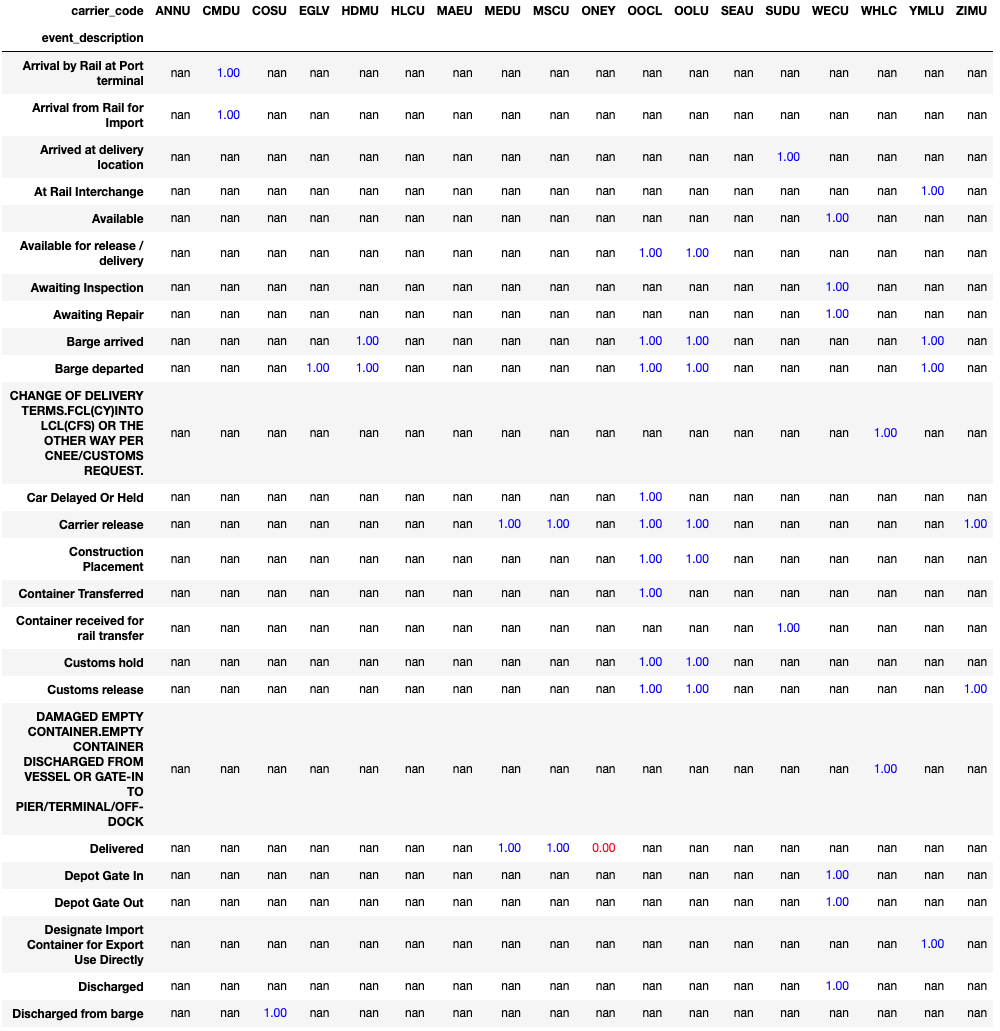

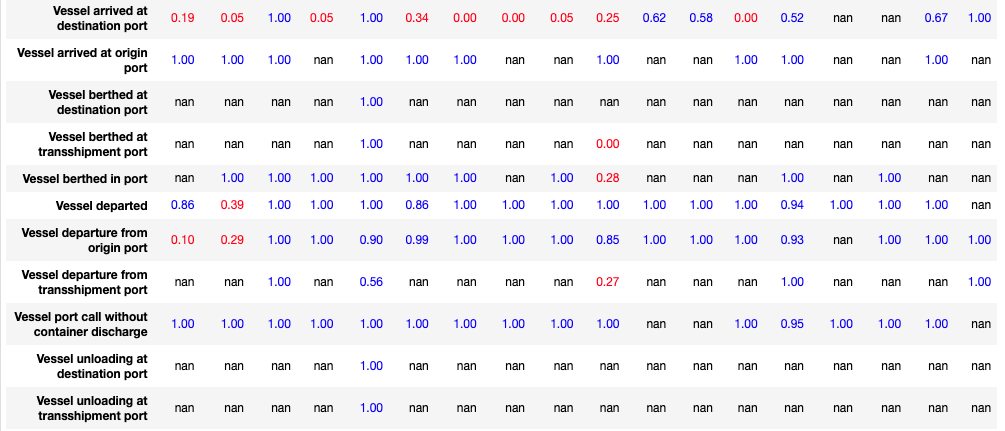

# Bonus

- Events have been known to happen at an origin or destination port but this detail is not captured in the event name. Are you able to find any instances where the event happened at either the origin/destination ports but the event name was not updated to reflect that? e.g. [gate out empty] should be [gate out empty at origin port] based on a location match
- A data enrichment process enhances the vessel data. What gaps still exist regarding the 3 vessel data points of [imo], [mmsi], [vessel]?
- Calculate import dwell time per destination port to determine which ports may perform better in regard to container throughput.
- Visualizations: any data visualization you can provide with your work to help the end user achieve your level of understanding of the data as efficiently as possible.
- Any other insights you derived while exploring this data set? Please feel free to share them with any context available.